# Energy Experiment

In [1]:
# %matplotlib widget
import os
import numpy as np
import matplotlib.pylab as plt

from smbbh_nu import SMBBH_NU
from plot_process import Plot_Result

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams["figure.figsize"] = [1.5 * i for i in plt.rcParams["figure.figsize"]]  # x2.5

## 0. Parameters Setting

Mass unit : $1.2\cdot 10^{12}$ $M_{\odot}$  
Length unit : kpc  
Time unit : $4.3\cdot 10^{5}$ years  
$G = 1$  
$\mu = G(m_{1} + m_{2})$

In [2]:
total_smbbh_mass = 1.2*(10**12)
black_hole_mass = [total_smbbh_mass/2, total_smbbh_mass/2]  # m1, m2
mu = 1 * (total_smbbh_mass/2 + total_smbbh_mass/2)
radius = 0.05
time_length = 1000  #1000
time_step = 0.0005  #0.0005
e = 0.5
rot_angles = [np.pi/6, np.pi/4, np.pi/6] # omega, I, Omega
constant_c = 0

## 1. Potential Function Setting

In [3]:
def potential_1(constant_c, tmp_array, ratio_mass, r):
    ratio_term = constant_c*(tmp_array*ratio_mass/r)
    first_term = 1/(r + r**3)
    second_term = np.arctan(r)/(r**2)
    V = ratio_term*(first_term - second_term)
    return V

## 2. Plot Orbit

In [4]:
experiment_1 = SMBBH_NU(black_holes_mass=black_hole_mass, 
                        constant_c=constant_c, 
                        radius=radius, 
                        eccentricity=e, 
                        angles=rot_angles, 
                        potential_function=potential_1)
result_1 = experiment_1.all_result_output()

Begin Simulation of Supermassive Binary Black Holes : 
rk4 process done !
All Processes Done !


In [5]:
plot1 = Plot_Result(result_dict=result_1)

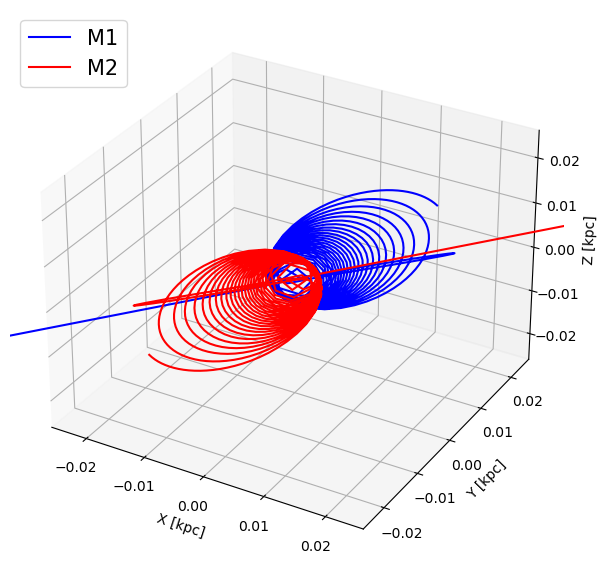

In [6]:
plot1.plot_rk4_result(radius=0.05)

## 3. Energy Calculate

In [7]:
all_data = result_1["no_rot_data"]

In [8]:
r1x, r1y, r1z = all_data[1:, 0], all_data[1:, 1], all_data[1:, 2]
r2x, r2y, r2z = all_data[1:, 3], all_data[1:, 4], all_data[1:, 5]

v1x, v1y, v1z = all_data[1:, 6], all_data[1:, 7], all_data[1:, 8]
v2x, v2y, v2z = all_data[1:, 9], all_data[1:, 10], all_data[1:, 11]

$$E_{i} = \frac{1}{2}(u_{i}^{2} + v_{i}^{2} + w_{i}^{2}) - \left( c\frac{\arctan{(r_{i})}}{r_{i}} + \frac{\mu}{r_{i}} \right),$$ where $i = 1,2$.

In [9]:
r1 = np.sqrt(r1x**2 + r1y**2 + r1z**2)
E1 = 0.5*(v1x**2 + v1y**2 + v1z**2) - (constant_c*(np.arctan(r1)/r1) + mu/r1)

r2 = np.sqrt(r2x**2 + r2y**2 + r2z**2)
E2 = 0.5*(v2x**2 + v2y**2 + v2z**2) - (constant_c*(np.arctan(r2)/r2) + mu/r2)

E_total = E1 + E2

### 3-1. $E_{0}$

In [10]:
print("E_0 = ", format(E_total[0], ".4e"))

E_0 =  -9.6072e+13


### 3-2. Total Energy

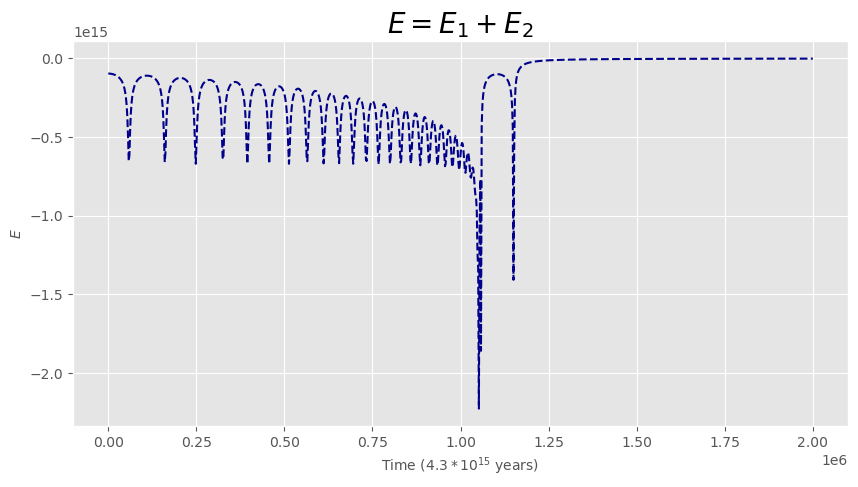

In [11]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
total_time = int(time_length / time_step)
dt_len = np.linspace(0, total_time, time_length - 1)
plt.subplot()
plt.plot(dt_len, E_total, "--", color="darkblue")
plt.xlabel("Time ($4.3*10^{15}$ years)", fontsize=10)
plt.ylabel("$E$", fontsize=10)
plt.title(r"$E = E_{1} + E_{2}$", fontsize=20)
plt.show()

### 3-3. $\Delta E = E_{t} - E_{0}$

In [12]:
Et_E0 = E_total - E_total[0]

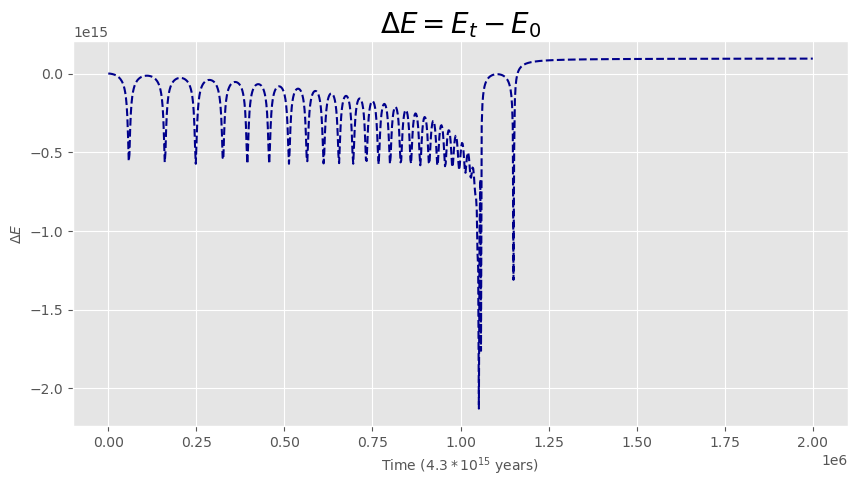

In [13]:
plt.figure(figsize=(10, 5))
total_time = int(time_length / time_step)
dt_len = np.linspace(0, total_time, time_length - 1)
plt.subplot()
plt.plot(dt_len, Et_E0, "--", color="darkblue")
plt.xlabel("Time ($4.3*10^{15}$ years)", fontsize=10)
plt.ylabel(r"$\Delta E$", fontsize=10)
plt.title(r"$\Delta E = E_{t} - E_{0}$", fontsize=20)
plt.show()

### 3-4. $\Delta E = E_{t}/E_{0}$

In [14]:
Et_divi_E0 = E_total/E_total[0]

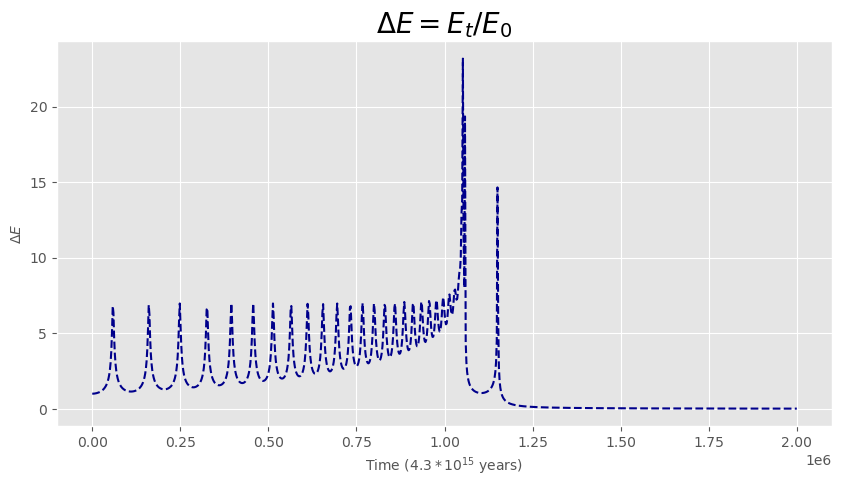

In [15]:
plt.figure(figsize=(10, 5))
total_time = int(time_length / time_step)
dt_len = np.linspace(0, total_time, time_length - 1)
plt.subplot()
plt.plot(dt_len, Et_divi_E0, "--", color="darkblue")
plt.xlabel("Time ($4.3*10^{15}$ years)", fontsize=10)
plt.ylabel(r"$\Delta E$", fontsize=10)
plt.title(r"$\Delta E = E_{t} / E_{0}$", fontsize=20)
plt.show()